<a href="https://colab.research.google.com/github/oleg1601/Mortem/blob/master/DES2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [15]:
import urllib.request
import os
import glob
import numpy as np
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

TensorFlow 2.x selected.


# Get the Class names 

This file contains a subset of the quick draw classes. I choose around 100 classes from the dataset. 

In [5]:
!wget 'https://raw.githubusercontent.com/oleg1601/Mortem/master/Back_End/class_names.txt'

--2020-01-30 19:32:09--  https://raw.githubusercontent.com/oleg1601/Mortem/master/Back_End/class_names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 860 [text/plain]
Saving to: ‘class_names.txt’

class_names.txt     100%[===================>]     860  --.-KB/s    in 0s      

2020-01-30 19:32:09 (221 MB/s) - ‘class_names.txt’ saved [860/860]



Read the classes names 

In [8]:
f = open("class_names.txt","r")
# And for reading use
classes = f.readlines()
f.close()
count = len(classes)
print(count)

100


In [9]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)

['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

# Download the Dataset 

Loop over the classes and download the currospondent data

In [11]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [16]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

# Load the Data 

Each class contains different number samples of arrays stored as .npy format. Since we have some memory limitations we only load 5000 images per class.  

In [0]:
def load_data(root, vfold_ratio=0.05, max_items_per_class= 20000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))
    # root -- announces the name of the folder, where our classes save
    # vfold_ratio -- define in percent how many items from one class distribute for test, in our way it is 20% 
    # max_items_per_class -- number of elements which we take from one class
    # glob.glob -- return a possibly-empty list of path names that match pathname, which must be a string containing a path specification.
    # in our code we return pathway as os.path.join(folder's name; and add to it .npy to define it as numpy model)

    #initialize variables 
    x = np.empty([0, 784]) # np.empty for X -- define empty array to store multi-dimensional data where 
                           # 784 count of pixel number in our pictures to order in memory.
    y = np.empty([0])      # np.empty for Y -- define empty array to store sequence number of pictures from class
    class_names = []       # define empty array to store class names from data

    #load each data file 
    for idx, file in enumerate(all_files):     # define each file from data
        data = np.load(file)                   # initialise load files
        data = data[0: max_items_per_class, :] # load files from 0 to max_items_per_class, colon -- means all file in list
        labels = np.full(data.shape[0], idx)   # np.full -- return a new array of given shape. 
                                               # The shape attribute for numpy arrays returns the dimensions of the array. 
                                               # If data has n rows and m columns, then data.shape is (n,m). So data.shape[0] is n.

        x = np.concatenate((x, data), axis=0)  # Join a sequence of arrays along an existing axis
        y = np.append(y, labels)               # np.append -- function is used to merge two arrays. 
                                               # This function returns a new array and the original array remains unchanged.

        class_name, ext = os.path.splitext(os.path.basename(file)) 
        # Split the pathname path into a pair (root, ext) such that root + ext == path,
        # and ext is empty or begins with a period and contains at most one period.
        class_names.append(class_name) 

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0]) 
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100)) 

    x_test = x[0:vfold_size, :] # allocate files from 0 to vfold_size for testing, colon -- means all file in list
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :] # allocate others files for training 
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('data') # load requable files
num_classes = len(class_names) # count element for neural network
image_size = 28 # define size of image

In [19]:
print(len(x_train))

1900000


#Show some random data 

hammer


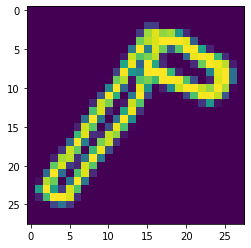

In [20]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Preprocess the Data 

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')
# pre-proces the data by ensuring the image are of shape 28*28*1 and converting the pixels into a float type variable for training

x_train /= 255.0 # x_train =np.interp(x_train, [0, 255], [0, 1]) -- alternatile form
                 # in other word it is simpe interpolation for pixel scaling
x_test /= 255.0

# Convert class vectors to class matrices
# we convert the class labels to one hot for trainig
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# The Model 

In [23]:
# Define model with 9 layers
model = keras.Sequential() # Define type of model anfd start add layers
model.add(layers.Convolution2D(16, (3, 3), padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Initialize model
Nadam = tf.keras.optimizers.Nadam()
#adam = tf.keras.train.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

# Training 

In [24]:
history = model.fit(x = x_train, y = y_train, validation_split=0.01, batch_size=256, verbose=2, epochs=100)

Train on 1881000 samples, validate on 19000 samples
Epoch 1/100
1881000/1881000 - 55s - loss: 1.2532 - top_k_categorical_accuracy: 0.8847 - val_loss: 0.9520 - val_top_k_categorical_accuracy: 0.9245
Epoch 2/100
1881000/1881000 - 46s - loss: 0.8894 - top_k_categorical_accuracy: 0.9294 - val_loss: 0.8539 - val_top_k_categorical_accuracy: 0.9348
Epoch 3/100
1881000/1881000 - 45s - loss: 0.8222 - top_k_categorical_accuracy: 0.9359 - val_loss: 0.8135 - val_top_k_categorical_accuracy: 0.9370
Epoch 4/100
1881000/1881000 - 45s - loss: 0.7891 - top_k_categorical_accuracy: 0.9390 - val_loss: 0.7929 - val_top_k_categorical_accuracy: 0.9390
Epoch 5/100
1881000/1881000 - 46s - loss: 0.7677 - top_k_categorical_accuracy: 0.9408 - val_loss: 0.7763 - val_top_k_categorical_accuracy: 0.9416
Epoch 6/100
1881000/1881000 - 45s - loss: 0.7527 - top_k_categorical_accuracy: 0.9421 - val_loss: 0.7643 - val_top_k_categorical_accuracy: 0.9429
Epoch 7/100
1881000/1881000 - 45s - loss: 0.7414 - top_k_categorical_acc

# Testing 

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 94.56%


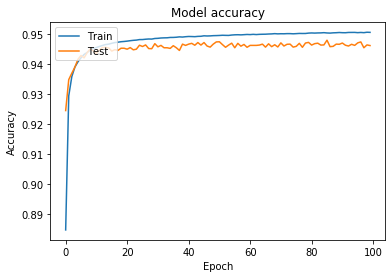

In [26]:
plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

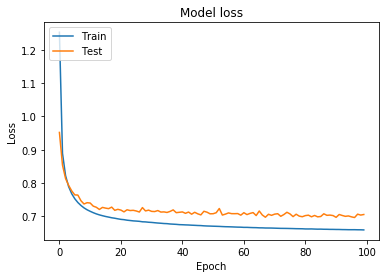

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Inference 

['pants', 'axe', 'tent', 'shorts', 'tooth']
[89 67 66 29 24]


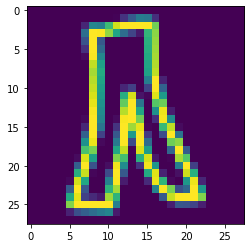

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx] ######## Check it with screenshots
#plt.subplot(2,2,1)  # Building Space for Image
plt.imshow(img.squeeze())
pred = model.predict(np.expand_dims(img, axis=0))[0]
indicator = (-pred).argsort()[:5]
latex = [class_names[x] for x in indicator] # Possible Variants
indicator.sort() # Sort value of indicator
new_ind = indicator[::-1] # Making reverse values of indicator
print(latex)
print(new_ind)

Text(0, 0.5, 'Percent value')

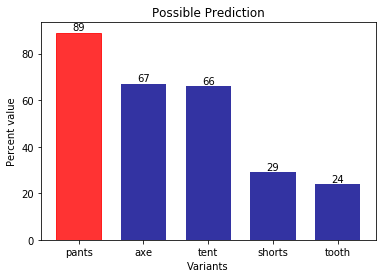

In [0]:
#plt.subplot(2,1,2)  # Building Space for Diagram
plot = plt.bar(latex, new_ind, color = "darkblue", alpha=0.8, width=0.7) 
# Initialize diagram with possible variants of our image
plot[0].set_color('r') # Draw Max point in Red colour
for value in plot: # Initialize for writing indicatour value in the top of bar 
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.0,
             1.002*height,'%d' % int(height  ), ha='center', va='bottom')
plt.title('Possible Prediction')
plt.xlabel('Variants')
plt.ylabel('Percent value')

# Store the classes 

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Install TensorFlowJS

In [1]:
!pip install "tensorflow>=1.7.0"
!pip install "enum34>=1.1.0"
!pip install tensorflowjs 

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 104.6MB 31kB/s 
     |████████████████████████████████| 256kB 47.4MB/s 
     |████████████████████████████████| 901kB 34.2MB/s 
     |████████████████████████████████| 450kB 51.8MB/s 
     |████████████████████████████████| 3.8MB 27.0MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=779191c6d2623868854225277de84396264c590f3eec9f0e503f1caf008395a7
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.

# Save and Convert 

In [0]:
model.save('keras.h5')

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

# Zip and Download 

In [0]:
!cp class_names.txt model/class_names.txt

In [32]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 82%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [0]:
from google.colab import files
files.download('model.zip')